In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native country','Income']

In [3]:
#loading the csv file
df=pd.read_csv('census.csv',names=cols,sep=' *, *',na_values='?',index_col=None)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,Income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
df.shape

(11619, 15)

In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native country     object
Income             object
dtype: object

In [6]:
df.isnull().sum()

age                 0
workclass         686
fnlwgt              0
education           0
education-num       1
marital-status      1
occupation        689
relationship        1
race                1
sex                 1
capital-gain        1
capital-loss        1
hours-per-week      1
native country    209
Income              1
dtype: int64

In [7]:
#large null values reported for worclass,occupation,native country

In [8]:
df[df['relationship'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,Income
11618,52,Private,82285,Ba,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None


In [9]:
#dropping the null values from the relationship attribute
df=df.dropna(subset=['relationship'])

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,Income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


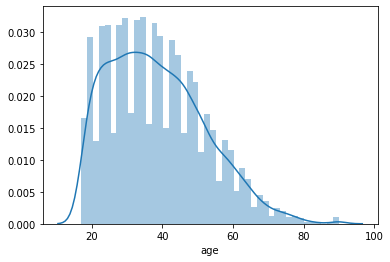

In [11]:
sns.distplot(df.age,kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019ADCB0CC08>,
      dtype=object)

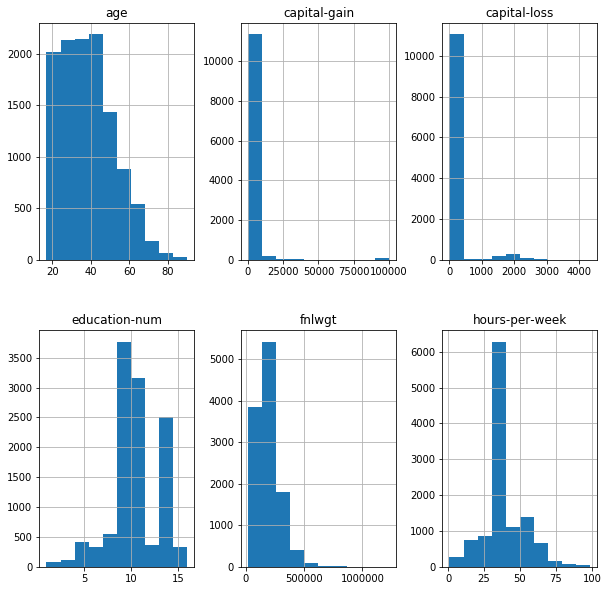

In [12]:
df.hist(figsize=(10,10),grid=True,layout=(2,3))

In [13]:
#checking for the the skewness
df.skew()

age                0.587760
fnlwgt             1.331629
education-num     -0.305119
capital-gain      12.163656
capital-loss       4.471497
hours-per-week     0.184531
dtype: float64

In [14]:
#removing the skewness
df['fnlwgt']=np.cbrt(df['fnlwgt'])
df['capital-gain']=np.power(df['capital-gain'],1/7)
df['capital-loss']=np.power(df['capital-loss'],1/7)

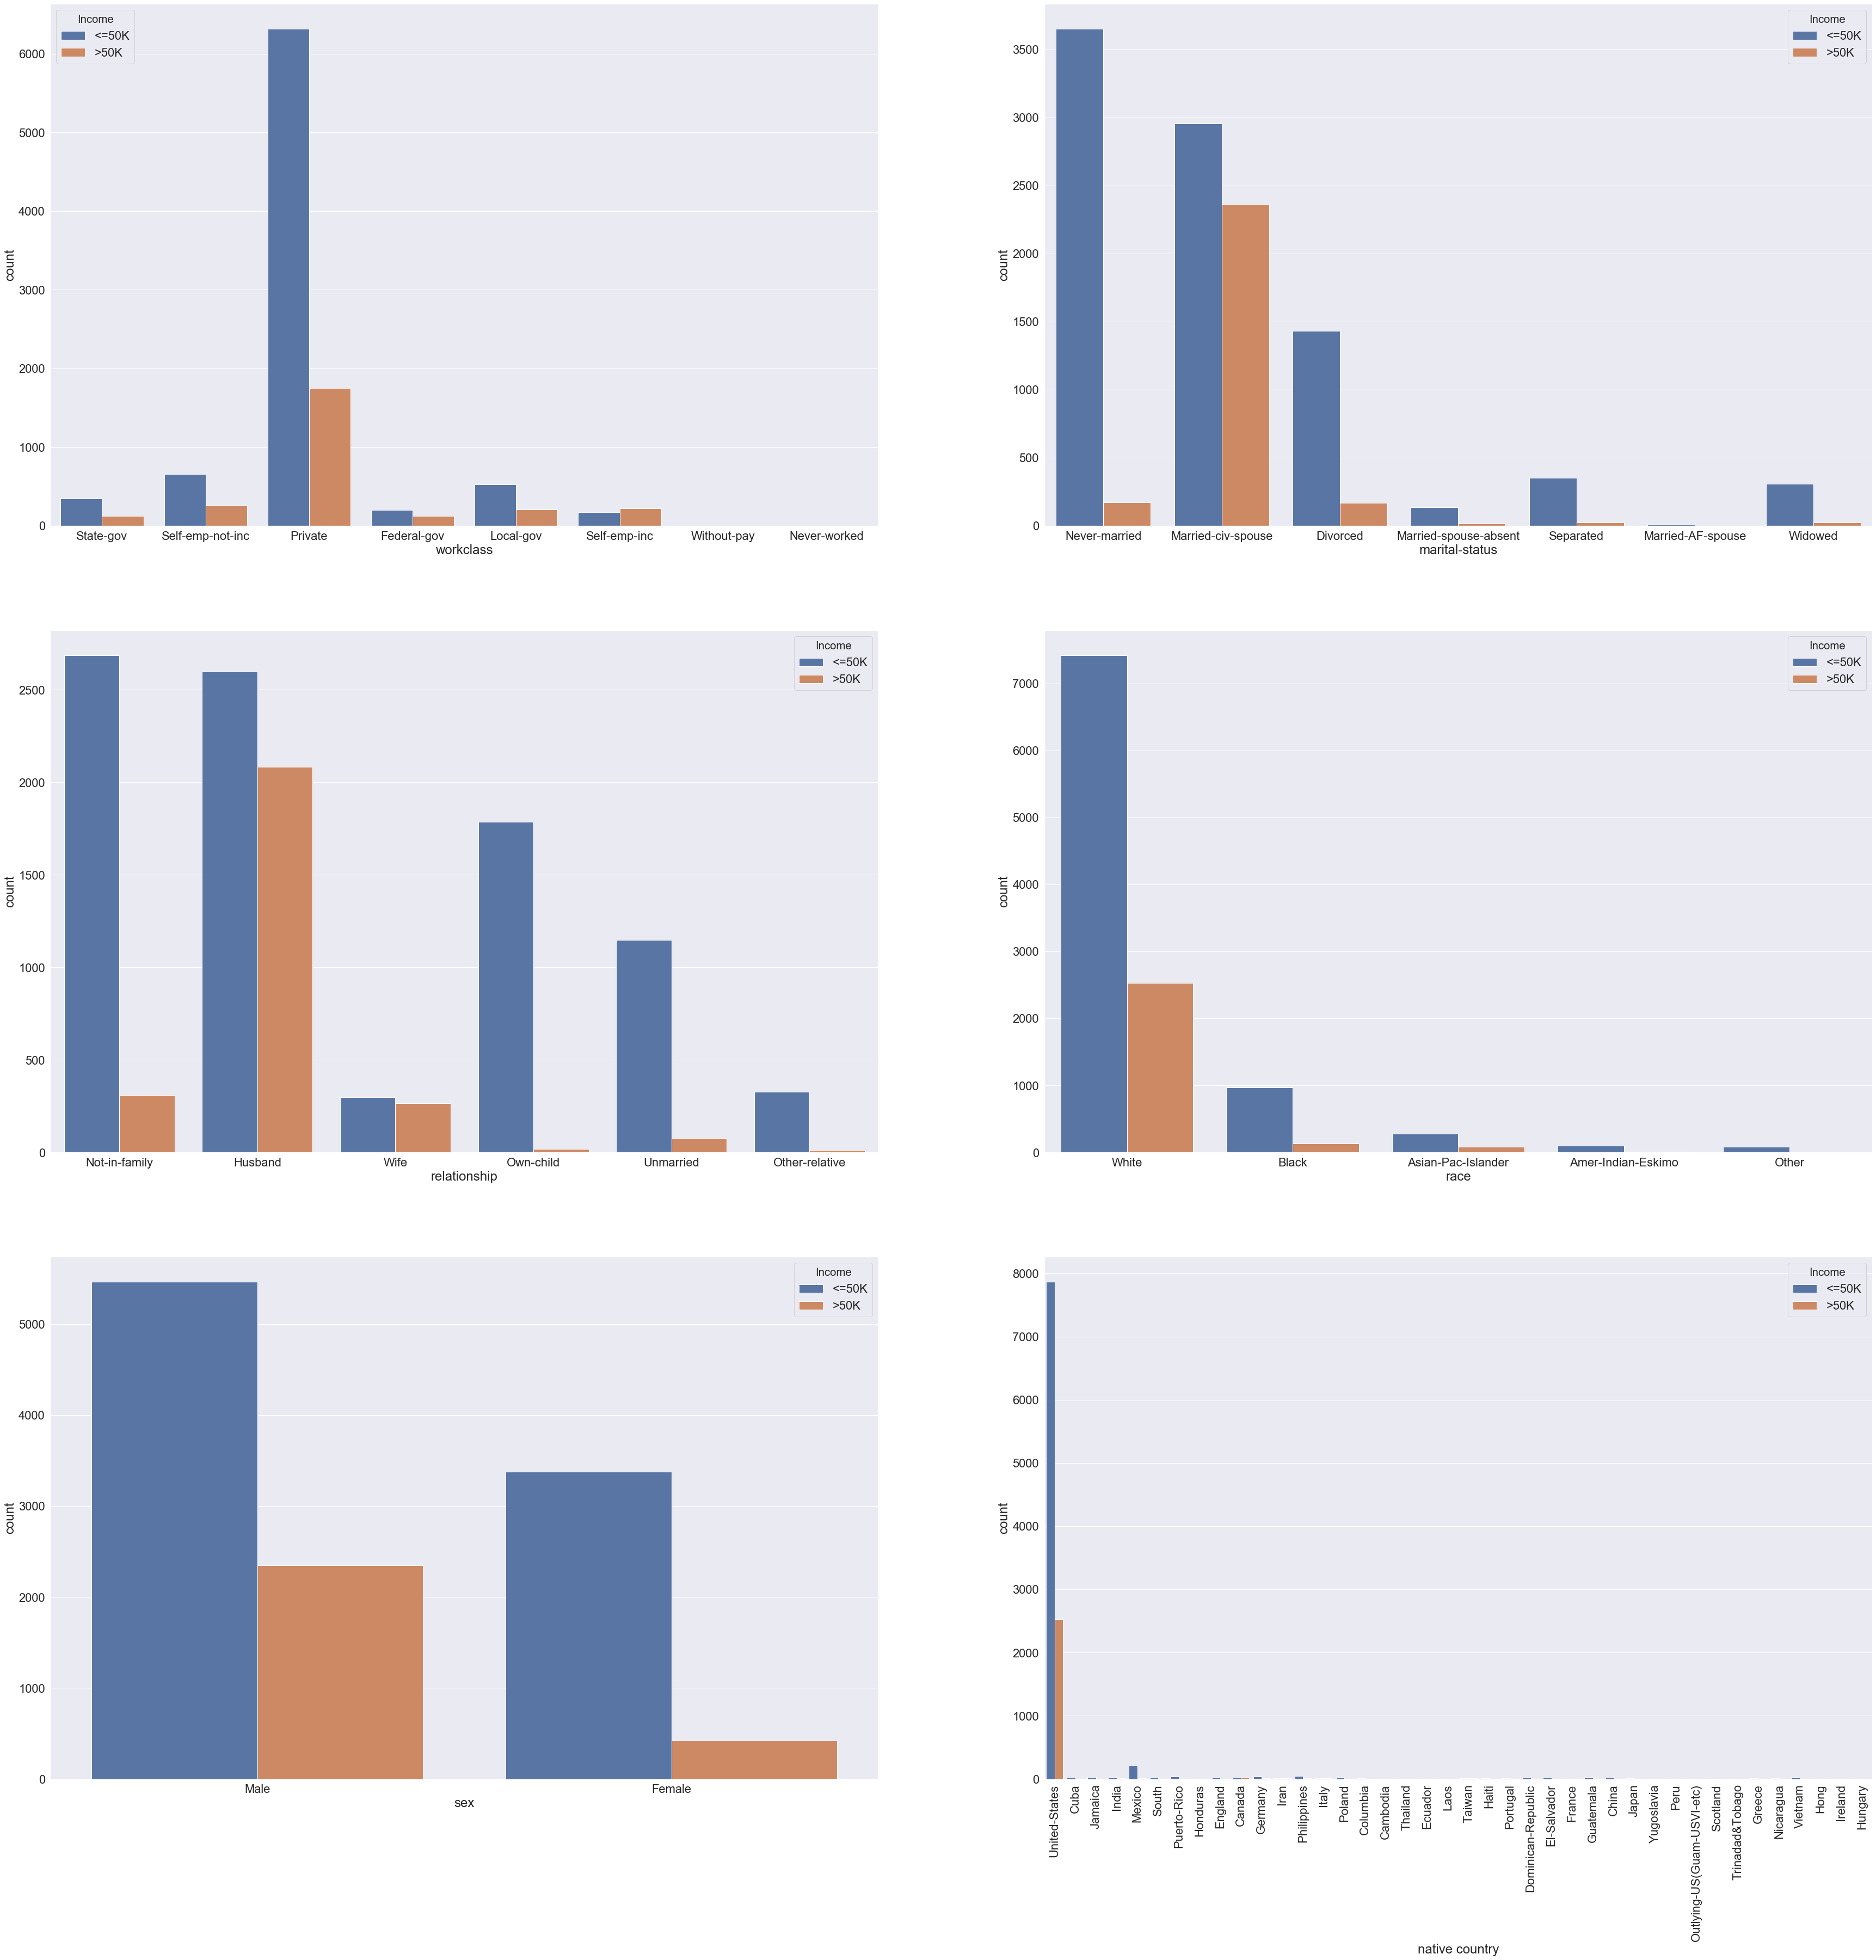

In [15]:
sns.set(font_scale=2.0)
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(60,60)
sns.countplot(x='workclass',hue='Income',data=df,ax=axes[0,0])
sns.countplot(x='marital-status',hue='Income',data=df,ax=axes[0,1])
sns.countplot(x='relationship',hue='Income',data=df,ax=axes[1,0])
sns.countplot(x='race',hue='Income',data=df,ax=axes[1,1])
sns.countplot(x='sex',hue='Income',data=df,ax=axes[2,0])
sns.countplot(x='native country',hue='Income',data=df,ax=axes[2,1])
plt.xticks(rotation=90)
plt.show()


In [16]:
#Large no. of the people are having workclass as private
#Most of the people are from white race
#Most the male are having income >50000
#approx all the people are from united states


<function matplotlib.pyplot.show(*args, **kw)>

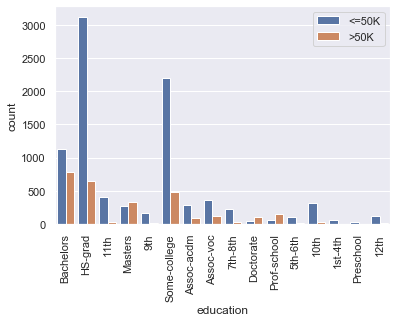

In [17]:
sns.set(font_scale=1.0)
sns.countplot(x='education',hue='Income',data=df)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

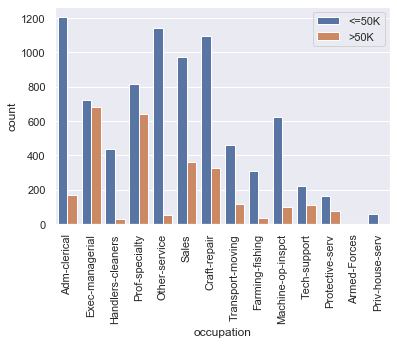

In [18]:
sns.set(font_scale=1.0)
sns.countplot(x='occupation',hue='Income',data=df)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show

In [19]:
#fill the null values with the most frequent values of the attributes
freq=df.workclass.dropna().mode()[0]
freq1=df.occupation.dropna().mode()[0]
freq2=df['native country'].dropna().mode()[0]

In [20]:
df['workclass']=df['workclass'].fillna(freq)
df['occupation']=df['occupation'].fillna(freq1)
df['native country']=df['native country'].fillna(freq2)

In [21]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native country    0
Income            0
dtype: int64

In [22]:
df.shape

(11618, 15)

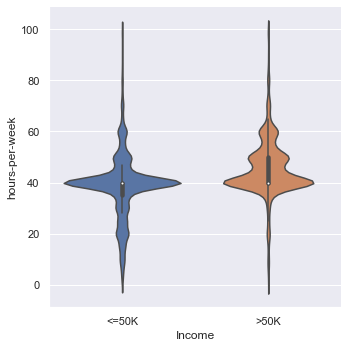

In [23]:
sns.catplot(kind='violin',x='Income',y='hours-per-week',data=df)

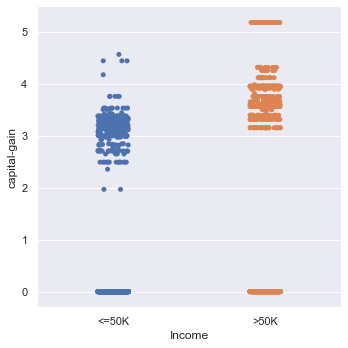

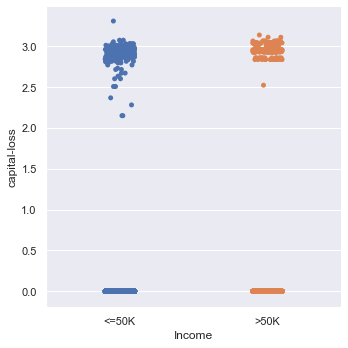

In [24]:
sns.catplot(kind='strip',x='Income',y='capital-gain',data=df)
sns.catplot(kind='strip',x='Income',y='capital-loss',data=df)

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,Income
0,39,State-gov,42.638029,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2.997446,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,43.675121,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States,<=50K
2,38,Private,59.967204,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,61.685627,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,69.686283,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [26]:
#drooping the education as it is same as column education-num and dropping fnlwgt as it is not impacting the data.

In [27]:
df=df.drop(['education','fnlwgt'],axis=1)

In [28]:
#creating the dummy values for all the classifiers
df=pd.get_dummies(df,columns=['sex','workclass','marital-status','occupation','relationship','race','native country','Income'],drop_first=True)

In [29]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,sex_Male,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia,Income_>50K
0,39,13.0,2.997446,0.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13.0,0.000000,0.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9.0,0.000000,0.0,40.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7.0,0.000000,0.0,40.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13.0,0.000000,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#renaming the column
df.rename(columns={'Income_>50K':'Income'},inplace=True)

In [31]:
y=df.iloc[:,80:81]

In [32]:
y.head()

,Income
0,0
1,0
2,0
3,0
4,0


In [33]:
x=df.drop(['Income'],axis=1)
x.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,sex_Male,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native country_Portugal,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia
0,39,13.0,2.997446,0.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.000000,0.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.000000,0.0,40.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.000000,0.0,40.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.000000,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#using StandardScaler technique for the regularization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [35]:
x=pd.DataFrame(data=x)

In [36]:
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)

accuracy_score corresponding to random state: 42 is: 0.8438037865748709
accuracy_score corresponding to random state: 43 is: 0.8326161790017211
accuracy_score corresponding to random state: 44 is: 0.8575731497418244
accuracy_score corresponding to random state: 45 is: 0.8407917383820999
accuracy_score corresponding to random state: 46 is: 0.8450946643717728
accuracy_score corresponding to random state: 47 is: 0.8386402753872634
accuracy_score corresponding to random state: 48 is: 0.8476764199655766
accuracy_score corresponding to random state: 49 is: 0.8416523235800344
accuracy_score corresponding to random state: 50 is: 0.8377796901893287
accuracy_score corresponding to random state: 51 is: 0.8455249569707401
accuracy_score corresponding to random state: 52 is: 0.830895008605852
accuracy_score corresponding to random state: 53 is: 0.842512908777969
accuracy_score corresponding to random state: 54 is: 0.8450946643717728
accuracy_score corresponding to random state: 55 is: 0.84810671256

In [37]:
#using cross val score
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print('Score:',score)

Score: [0.83562823 0.84724613 0.84423408 0.84933276 0.82996126]


In [38]:
#Using DTC Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
sample_split_range = list(range(2, 80))
param_grid = dict(min_samples_split=sample_split_range)
grid_search=GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

In [39]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [40]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=71,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = dtc.predict(x)
    score = dtc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8784161824833225
The F1 Score is: 0.8763146563220854
The score is: 0.8317555938037866
The F1 Score is: 0.828397603258214


In [42]:
#using Support Vector Algorithm
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 200]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid1 = {'C': Cs, 'gamma' : gammas}
grid1_search = GridSearchCV(svc, param_grid1, cv=3)

In [43]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
grid1_search.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
svc = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = svc.predict(x)
    score = svc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8536690337852378
The F1 Score is: 0.847305256209416
The score is: 0.8347676419965576
The F1 Score is: 0.826283908043577


In [46]:
#Using te ensemble technique as Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model_new=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25],    
    'min_samples_leaf': [1, 2, 4, 10, 15 ],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(model_new, params, cv = 3)

In [47]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
model_new = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8776630083925113
The F1 Score is: 0.8692628228017877
The score is: 0.8485370051635112
The F1 Score is: 0.8374004718277834


In [50]:
#Further found the Random Forest Classifier is giving te best results and Hence considering this model

In [51]:
from sklearn.externals import joblib
joblib.dump(model_new,'census_classification.pkl')

['census_classification.pkl']